Change directory and upload programs 

In [1]:
import os
os.getcwd()
os.chdir("/home/cbb575_mcm274/Final")

import pandas as pd
import numpy as np

Upload cytokine helper 2 node csv file 

In [3]:
cytokine = pd.read_csv("Final cytokine.csv") 
cytokine = cytokine[cytokine['selected'] == True]

genes = cytokine['EnrichmentMap::Genes'].str.split(pat='|', expand=True)

data = pd.merge(left = cytokine, right = genes, left_on = cytokine.index, right_on = genes.index, how = 'inner')


Upload cytokine helper 2 gene list

In [4]:
names = pd.read_csv("cluster0heatmap.txt", sep = "\t")
names = names["Gene"]

Create dataframe of genes and average -log10 p-value of terms associated with each gene

In [5]:
plot = pd.DataFrame(columns=['genes', '-log10 p-value'])

for name in names:
    filter0 = data[0] == name
    filter1 = data[1] == name 
    filter2 = data[2] == name
    filter3 = data[3] == name
    filter4 = data[4] == name
    filtercombo = filter0 | filter1 | filter2 | filter3 | filter4
    datavalue = data[filtercombo]
    new_row = pd.DataFrame({'genes': [name], '-log10 p-value': [np.mean(datavalue["EnrichmentMap::-log10(pvalue) (Data Set 1)"])]})
    plot = pd.concat([plot, new_row], ignore_index=False)

/tmp/ipykernel_2613340/1483273329.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot = pd.concat([plot, new_row], ignore_index=False)


Create dataframe of genes and number of associated terms 

In [6]:
hplot = pd.DataFrame(columns=['genes', 'terms'])
for name in names:
    filter0 = data[0] == name
    filter1 = data[1] == name 
    filter2 = data[2] == name
    filter3 = data[3] == name
    filter4 = data[4] == name
    filtercombo = filter0 | filter1 | filter2 | filter3 | filter4
    new_row = pd.DataFrame({'genes': [name], 'terms': [sum(filtercombo)]})
    hplot = pd.concat([hplot, new_row], ignore_index=False)

Create merged dataframe containing genes, avereage -log10 p-value of terms per gene, and number of terms per gene 

In [7]:
stackedplot = pd.merge(left = plot, right = hplot, left_on = 'genes', right_on = 'genes', how = 'inner')
stackedplot.set_index('genes', inplace=True)

Create stacked bar graph of average -log10 p-value of terms per gene and number of terms per gene 

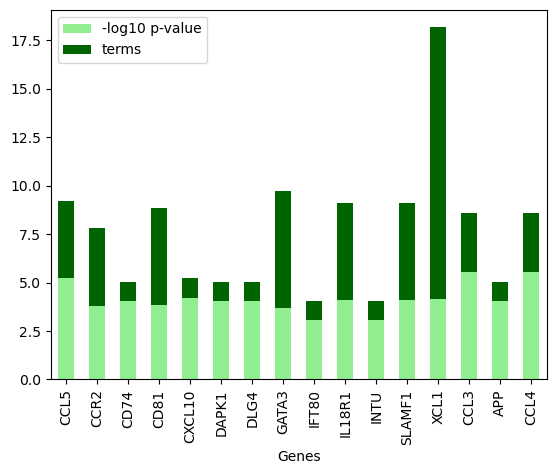

In [8]:
comboplot = stackedplot.plot(kind = 'bar', stacked = True, xlabel = "Genes", color = ['lightgreen', 'darkgreen'])

Save graph

comboplot.figure.savefig('comboplot.png', format='png', dpi=300, bbox_inches='tight', transparent=False)